In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
file_list = drive.ListFile({'q': "'1Meix5qeRavdOt06r2kL906x1MGqmKjO3' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: sentiment.ipynb, id: 1sZ6hVTJ1dIw5KaH6evS2FTWZm5EpeYxK
title: reviews, id: 1qqL8Av5c0DdJYgW3gahtetzNUj5bzMaJGTimMgefWOk
title: reviews.csv, id: 1MU-qkHR3O2c_qosXXR_E-EnaYTPHg9MY


In [0]:
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
downloaded = drive.CreateFile({'id':'1MU-qkHR3O2c_qosXXR_E-EnaYTPHg9MY'}) # replace the id with id of file you want to access
downloaded.GetContentFile('xyz.csv') 

In [2]:
df=pd.read_csv("reviews.csv")

In [3]:
df.head()

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
y=df['Label']

In [6]:
Sentiment_words=[]
for row in df['Label']:
    if row == 1:
        Sentiment_words.append('bad')
    elif row == 2:
        Sentiment_words.append('neutral')
    elif row == 3:
        Sentiment_words.append('positive')
    elif row == 4:
        Sentiment_words.append('good')
    elif row == 5:
        Sentiment_words.append('excellent')
    else:
        Sentiment_words.append('Failed')
df['Sentiment_words'] = Sentiment_words

In [7]:
word_count=pd.value_counts(df['Sentiment_words'].values, sort=False)
word_count

bad           2469
good         18054
neutral       2251
excellent    79173
positive      5071
dtype: int64

In [8]:
Index=[1,2,3,4,5]
plt.figure(figsize=(15,5))
plt.bar(Index,word_count,color = 'blue')
plt.xticks(Index,['bad','neutral','positive','good','excellent'],rotation=45)
plt.ylabel('word_count')
plt.xlabel('word')
plt.title('Count of Moods')
plt.bar(Index, word_count)
for a,b in zip(Index, word_count):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')

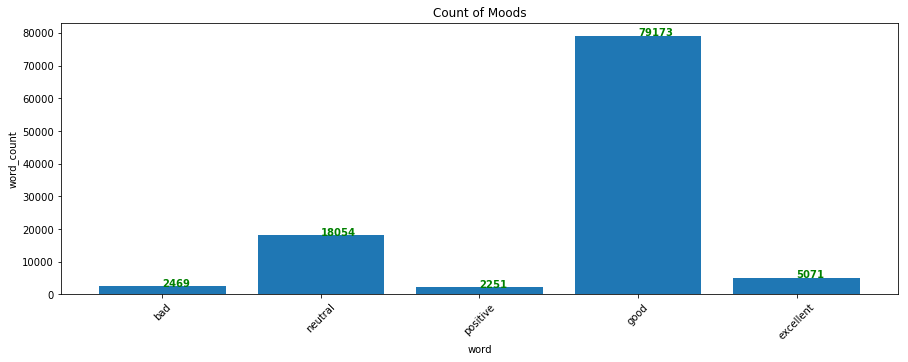

In [9]:
plt.show()

In [10]:
df['Review'].head()

0                                 good and interesting
1    This class is very helpful to me. Currently, I...
2    like!Prof and TAs are helpful and the discussi...
3    Easy to follow and includes a lot basic and im...
4    Really nice teacher!I could got the point eazl...
Name: Review, dtype: object

In [11]:
# Creating corpus
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() # For converting into root words
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GanapathySubramanian\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
corpus = []

for i in range(len(df['Review'])):
    review = df['Review'][i]
    review = re.sub('[^a-zA-z]', " ", review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = " ".join(review)
    corpus.append(review)

In [13]:
corpus[0:5]

['good interest',
 'class help current still learn class make lot basic music knowledg',
 'like prof ta help discuss among student quit activ reward learn experi',
 'easi follow includ lot basic import techniqu use sketchup',
 'realli nice teacher could got point eazliy v']

In [51]:
#Building bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=20000)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 2].values
X.shape

MemoryError: 

In [15]:
new_corpus = ""
for review in corpus:
    new_corpus = new_corpus + " " + review

In [16]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GanapathySubramanian\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\GanapathySubramanian\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [17]:
new_corpus[0:100]
new_corpus_tokenized = nltk.word_tokenize(new_corpus)
text = nltk.pos_tag(new_corpus_tokenized)

In [18]:
new_corpus_tokenized[0:5]

['good', 'interest', 'class', 'help', 'current']

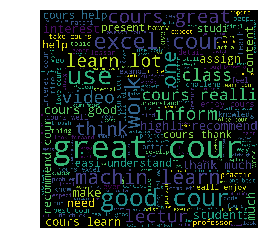

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black',
                      width=3000,
                      height=3000
                     ).generate(new_corpus)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
print (df['Label'].value_counts())

5    79173
4    18054
3     5071
1     2469
2     2251
Name: Label, dtype: int64


In [22]:
X.shape[0] == y.shape[0]

True

In [23]:
X.shape

(107018, 21804)

In [29]:
y[:2000]

array([5, 5, 5, ..., 5, 5, 4], dtype=int64)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X[:30000], y[:30000], test_size = 0.25)

MemoryError: 

In [45]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
#print X_test
y_pred = classifier.predict(X_test)

MemoryError: 

In [33]:
y_pred[0:5]

array([2, 1, 3, 4, 4], dtype=int64)

In [34]:
for i in range(len(y_test)):
    print (int(y_test[i]), "      ", int(y_pred[i]))

5        2
5        1
5        3
5        4
4        4
4        1
5        4
4        2
4        4
5        1
5        2
4        2
5        5
5        2
5        1
5        3
4        2
4        2
5        1
5        5
4        2
2        4
5        2
5        3
4        2
1        5
5        5
5        5
4        2
5        3
5        2
5        2
3        2
5        2
5        2
3        2
5        2
4        2
5        5
5        2
5        1
5        1
5        2
5        2
1        2
5        4
5        1
5        2
3        2
5        4
5        1
5        2
5        2
5        2
5        4
5        2
5        2
4        2
5        2
5        2
4        2
5        3
5        3
5        1
3        2
5        2
5        2
5        2
5        2
5        5
5        2
5        4
5        2
4        2
5        2
5        4
5        5
5        2
4        4
5        5
5        4
5        2
4        4
5        2
3        2
4        2
4        2
5        2
5        2
4        1
1        2

3        4
5        2
4        2
5        2
5        3
4        3
4        4
5        2
2        2
5        3
5        2
5        2
5        1
5        2
4        4
4        2
5        2
3        4
5        4
4        2
5        4
5        4
4        1
4        2
5        1
5        2
5        4
5        2
5        2
5        3
5        2
5        2
5        2
4        2
5        2
1        2
5        5
5        4
5        2
3        2
5        2
4        4
4        4
5        2
5        2
4        2
5        2
5        2
4        3
4        2
5        5
5        2
5        2
5        2
4        2
5        1
4        2
3        1
5        2
4        4
5        2
5        2
5        2
5        3
2        1
4        5
2        5
4        3
4        1
1        4
1        4
2        2
3        4
5        4
4        2
4        2
5        3
5        4
5        2
3        4
1        4
5        2
4        2
5        2
5        3
5        2
5        2
5        3
4        5
5        4
4        2

5        2
5        2
5        5
4        2
5        2
5        2
4        2
5        2
5        4
5        1
4        5
5        3
5        4
5        2
3        4
5        2
5        1
5        4
5        5
5        5
5        1
5        3
5        2
5        2
5        5
5        2
4        4
5        1
3        2
4        4
4        2
3        2
5        4
4        2
5        2
2        2
5        2
5        2
4        2
3        2
5        5
5        4
5        4
5        5
5        4
4        2
5        3
4        3
5        2
5        2
4        4
4        2
4        2
3        5
5        5
5        2
5        4
5        2
5        2
5        2
5        2
5        3
4        2
5        5
5        2
5        5
5        5
5        2
5        4
5        2
5        2
5        4
5        2
5        2
1        5
4        3
5        2
5        5
4        2
5        2
5        2
4        2
4        2
5        4
5        2
5        2
5        4
4        4
5        2
4        2
5        2

5        4
5        5
5        4
1        2
5        5
5        4
5        2
4        1
5        3
5        2
5        4
4        2
5        4
3        2
4        5
5        4
5        2
5        1
4        3
4        2
5        2
4        2
3        2
5        2
5        5
5        3
3        3
5        2
4        1
5        3
5        2
2        4
5        5
5        5
1        2
2        2
5        1
5        2
5        4
5        2
5        1
4        5
5        1
4        4
5        4
5        2
5        4
5        2
5        2
5        1
5        2
4        4
5        4
5        2
3        4
5        2
4        5
3        2
5        2
4        5
5        2
5        5
4        2
5        2
5        1
1        2
5        4
4        2
5        2
4        2
5        5
5        2
3        2
5        2
5        1
4        5
5        1
3        5
5        3
5        2
5        1
4        4
5        2
5        2
4        4
5        2
5        3
5        2
5        5
5        2
5        1

5        2
5        5
5        2
5        2
4        2
5        4
1        5
3        2
4        1
5        2
3        5
5        2
5        1
4        2
5        2
3        4
5        2
5        3
4        3
5        2
5        2
5        2
5        2
5        4
5        4
5        2
5        2
2        2
3        3
5        1
4        4
4        2
4        2
5        5
5        2
1        2
5        2
5        5
4        4
3        2
3        2
5        2
2        3
5        2
5        1
5        2
4        4
5        3
4        1
5        2
5        3
5        4
5        4
5        2
5        3
4        2
5        1
5        5
5        2
5        2
5        5
5        2
5        1
5        2
5        2
5        3
4        5
4        3
5        4
5        2
5        2
5        2
5        5
5        2
5        4
5        2
4        2
5        2
2        2
5        2
5        5
5        2
5        5
4        5
5        2
4        2
5        2
5        2
5        5
5        1
5        2

5        2
1        1
5        4
5        1
2        5
5        3
4        2
5        2
4        2
5        4
3        4
4        4
3        2
4        2
5        4
4        1
5        3
5        2
4        2
5        2
5        2
4        1
5        2
5        3
5        2
3        1
5        2
5        2
3        5
5        3
5        2
5        2
5        1
5        2
5        2
5        3
5        1
5        5
4        4
3        5
5        3
5        2
5        5
5        5
4        2
5        2
4        2
5        4
2        5
5        2
5        2
1        4
5        2
5        2
5        1
5        2
5        1
5        5
5        2
5        2
5        4
5        2
5        4
5        2
4        2
5        2
5        5
5        2
5        2
5        5
5        2
5        5
5        4
5        3
5        4
5        2
5        1
5        2
1        2
5        2
2        2
5        2
5        4
5        1
5        2
5        2
5        2
5        3
4        5
4        2
5        1

In [35]:
#Example
new_reviews = ["Course is too good","i love this course", "hate this video luctures" ]

def to_root_sentence(review):
    review = re.sub('[^a-zA-z]', " ", review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = " ".join(review)
    return review
    
def build_feature_vector(review):
    X = cv.transform([review]).toarray()
    return X

for review in new_reviews:
    print (review)
    review = to_root_sentence(review)
    X = build_feature_vector(review)
    print ("-----   Predicted Rating :", classifier.predict(X), "  -----\n")

Course is too good
-----   Predicted Rating : [2]   -----

i love this course
-----   Predicted Rating : [2]   -----

hate this video luctures
-----   Predicted Rating : [1]   -----



In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test
predicted = y_pred
results = confusion_matrix(actual, predicted)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted))

Confusion Matrix :
[[  31   84   15   32   40]
 [  18   85   20   25   31]
 [  30  149   32   47   52]
 [ 112  550   96  157  115]
 [ 378 2022  338  557  484]]
Accuracy Score : 0.14345454545454545
Report : 
             precision    recall  f1-score   support

          1       0.05      0.15      0.08       202
          2       0.03      0.47      0.06       179
          3       0.06      0.10      0.08       310
          4       0.19      0.15      0.17      1030
          5       0.67      0.13      0.22      3779

avg / total       0.50      0.14      0.19      5500



In [52]:
from sklearn import svm

In [56]:
model = svm.SVC(kernel='linear', gamma=1) 
model.fit(X, y)
model.score(X, y)

MemoryError: 